### Some Prerequisites

In [2]:
# Modules
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Fonts
csfont = {'fontname':'Palatino Linotype', 'size': 15}
hfont = {'fontname':'Palatino Linotype', 'size': 13}

# The One-Dimensional Random Walks

## Single 1D Walk

Here is a function `walk_1D()` that simulates a 1D random walk. The function accept two arguments -- the probability of the walker moving right ($p$) and the number of steps (n_steps). Additionally, position vs number of steps has been for the single 1D random walk. 

First, we create an array, `pos`, to store the positions of the walker at each step. Subsequently, the function iterates through the specified number of steps, randomly determining the direction of each step based on the probability *p*. The walker moves left (-1) or right (1) with equal likelihood, and their position is updated accordingly in the `pos` array. The function returns the final position array. The code then generates a plot visualising the progression of the random walk. 

In [12]:
n_steps = 1000
p = 0.5

def walk_1D(n_steps, p):
    global pos
    pos = np.zeros(n_steps) # Stores positions
    for i in range(1, n_steps):
        if np.random.rand() <= p:
            step = -1
        else:
            step = 1
        pos[i] = pos[i - 1] + step
    return pos

print('Array of Positions: ', walk_1D(n_steps, p))

Array of Positions:  [  0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9.  -8.  -9.  -8.  -7.
  -6.  -7.  -8.  -7.  -8.  -9. -10. -11. -10. -11. -10.  -9. -10. -11.
 -12. -11. -12. -13. -12. -13. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -4.  -3.  -4.  -5.  -4.  -5.  -6.  -5.  -6.  -7.
  -6.  -5.  -6.  -7.  -8.  -7.  -8.  -7.  -8.  -7.  -6.  -5.  -4.  -5.
  -4.  -3.  -4.  -5.  -4.  -3.  -2.  -3.  -4.  -5.  -6.  -7.  -6.  -5.
  -6.  -7.  -8.  -9. -10. -11. -12. -11. -12. -13. -12. -13. -12. -11.
 -12. -13. -14. -15. -16. -17. -18. -19. -18. -19. -18. -17. -16. -17.
 -16. -15. -14. -15. -14. -15. -16. -15. -16. -17. -16. -15. -14. -15.
 -16. -17. -16. -15. -16. -15. -14. -15. -16. -17. -18. -19. -18. -17.
 -18. -17. -16. -15. -16. -17. -16. -15. -14. -15. -14. -15. -16. -15.
 -16. -15. -16. -15. -14. -15. -14. -15. -14. -15. -14. -13. -14. -13.
 -12. -13. -14. -13. -14. -15. -14. -13. -12. -11. -10.  -9. -10.  -9.
  -8.  -9.  -8.  -7.  -6.  -7.  -6.  -7.  -6.  -7.  -8. 

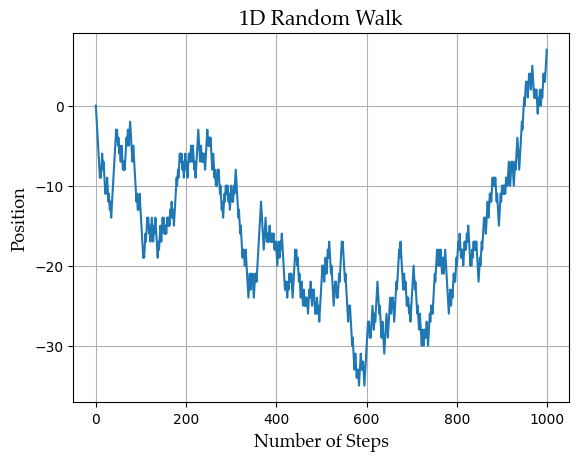

In [13]:
steps = np.arange(0, n_steps, 1)

plt.plot(steps, pos)
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Position', **hfont)
plt.title('1D Random Walk', **csfont)
plt.grid(True)
plt.show()

## Multiple 1D Random Walks

Here, we simulate a large number of walks, that is, 1000 walks for $p = 1/2$ and record the trajectory of each random walker by storing them in an array. 

This code is like running a thousand little experiments where a tiny dot takes random steps on a straight line. Imagine these dots are having a stroll, and we're watching where they end up after a certain number of steps. We want to see if there's any pattern in their wanderings. So, we let each dot take a walk, record its path, and then do this a thousand times! The code then plots all these paths on a single graph, so we can see the overall picture of where the dots tend to end up. This helps us understand how randomness works and what kind of patterns might emerge from it.

We then plot a histogram of the final positions of all the walkers. We notice that it is a Gaussian with mean $\mu \approx 0$ and standard deviation $\sigma \approx \sqrt{\text{n_steps}}$.

### Our Initial Approach

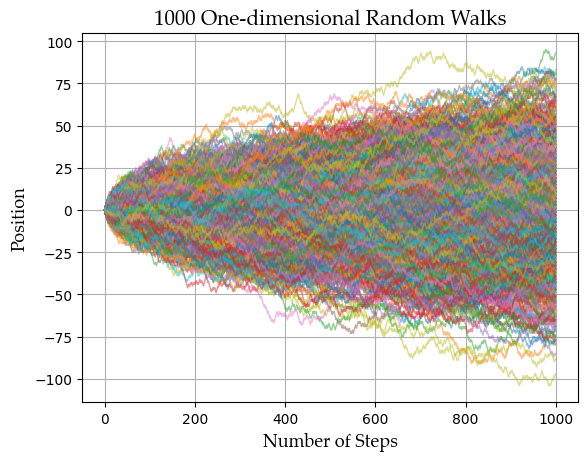

In [14]:
n_walks = 1000
pos2 = np.zeros((n_walks, n_steps))

for i in range(n_walks): 
    for j in range(1, n_steps):
        if np.random.rand() < p:
            step = -1
        else:
            step = 1
        pos2[i, j] = pos2[i, j - 1] + step # 2D matrix
        
for i in range(n_walks):
    plt.plot(steps, pos2[i, :], linewidth=1, alpha=0.5) # Each step in a walk --> [i, :]
    
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Position', **hfont)
plt.title('1000 One-dimensional Random Walks', **csfont)
plt.grid(True)
plt.show()

### A More Efficient Approach

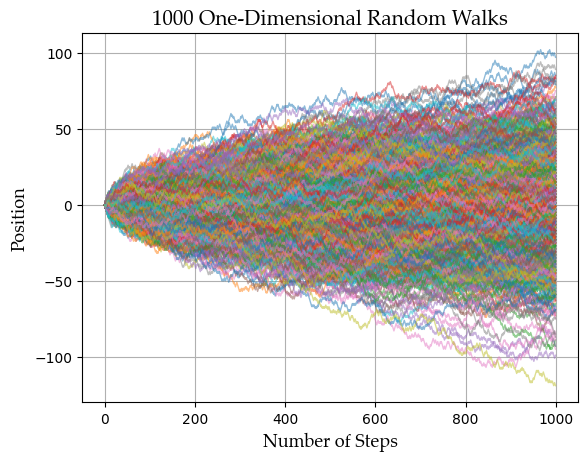

In [282]:
n_walks = 1000  # Number of walks to simulate
pos2 = [walk_1D(n_steps, p) for _ in range(n_walks)]

for i in range(n_walks):
    plt.plot(steps, pos2[i], linewidth=1, alpha=0.5)  # Each step in a walk --> [i, :]

plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Position', **hfont)
plt.title('1000 One-Dimensional Random Walks', **csfont)
plt.grid(True)
plt.show()

### Histogram of Final Positions

The square root of 1000 steps is approximately 31.62 and this value is close to our standard deviation. Similarly, our mean is very close to zero.

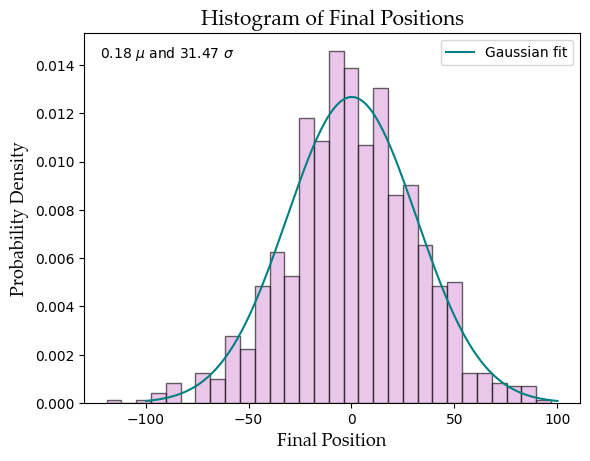

In [283]:
finpos = [i[-1] for i in pos2]

mu = np.mean(finpos)
std = np.std(finpos)
var = np.var(finpos)
x_array = np.linspace(mu-100, mu+100, 201)    # choosing sample points to draw the curve
g_array = 1./np.sqrt(2*np.pi*var) * np.exp(-0.5*(x_array-mu)**2/var)    # Gaussian curve

plt.hist(finpos, bins=30, density = True, alpha=0.6, color='plum', edgecolor='black')
plt.plot(x_array, g_array, color='teal', label='Gaussian fit')

plt.figtext(0.15, 0.83, "{:.2f} $\mu$ and {:.2f} $\sigma$".format(mu, std))
plt.xlabel('Final Position', **hfont)
plt.ylabel('Probability Density', **hfont)
plt.title('Histogram of Final Positions', **csfont)
plt.legend()
plt.show()

In [145]:
# Error in Standard Deviation
np.abs(std**2 - 1000)

5.339100000000258

### Relation Between End-to-End Distance and Number of Steps

Now, we are interested in not just about where each dot ends up, but also how far it has traveled overall. We define a function *Rd* that calculates something called the "end-to-end distance" $R_{d}(n)$ for each step of the walk. It is like measuring the total distance traveled by the dot from its starting point for each step. 

The function `Rd()` takes `pos2`, which contains all the positions of each dot over each step. We calculate the distances traveled for all dots at each step, then average them out. To make things clearer, we square the average distances to emphasise the differences better. Once we have these distances, we plot them against the number of steps. Each point on the graph represents how far, on average, the dots have travelled after a certain number of steps. 

For 1D random walks, this relation is found to be linear with slope 1. However, in our case, we have a slope of 0.64 due to slight error.

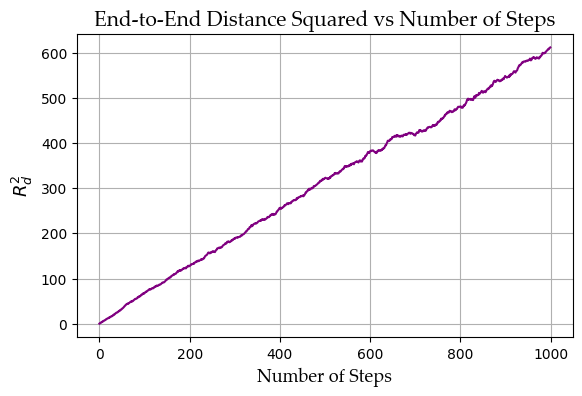

In [290]:
# End-to-end positions
def Rd(pos2):
    n_steps = len(pos2[0]) - 1 # as indices start from 0.
    end_to_end_distances = np.zeros(n_steps + 1)
    for i in pos2:
        for j in range(1, n_steps + 1):
            end_to_end_distances[j] += abs(i[j] - i[0])
    return (end_to_end_distances/len(pos2))**2

all_dis = Rd(pos2)
plt.plot(range(len(all_dis)), all_dis, color = 'purple')
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('$R_{d}^2$', **hfont)
plt.title('End-to-End Distance Squared vs Number of Steps', **csfont)
plt.gca().set_aspect("equal")
plt.grid(True)
plt.show()

In [95]:
# Slope of Graph
m, c = np.polyfit(range(len(Rd)), Rd, deg = 1)
print('Slope:', m)

Slope: 0.6381346016255697


# Two-Dimensional Random Walks

We now generalise the above problem to an $N$-step random walk on a two-dimensional grid. In such a walk, the
walker starts off at the origin and, at every time step, moves a fixed amount in either the x or y directions.
Thus, at every time-step, they randomly choose between one of four possibilities. This is then repeated $N$ times. We also plot the histograms and find that the square of end-to-end distances $R^{2}_{d}(n)$ is modulus of the vector sum.

## Single Walk

This function `walk_2D(n_steps)` creates a two-dimensional random walk with a specified number of steps `n_steps`. It initialises arrays for the $x$ and $y$ coordinates, starting at (0, 0). The walk progresses by randomly choosing directions for left/right (LR) and up/down (UD) movements at each step. If LR is 1 (right), the x-coordinate increases by 1; if LR is 0 (left), it decreases by 1. Similarly, if UD is 1 (down), the y-coordinate decreases by 1; if UD is 0 (up), it increases by 1. The function returns arrays of x and y coordinates representing the random walk's path. The code then generates and stores a specific two-dimensional random walk with 1000 steps, storing its x and y coordinates in `x_steps` and `y_steps`.

In [98]:
def walk_2D(n_steps):
    x, y = np.zeros(n_steps), np.zeros(n_steps)
    for i in range(1, n_steps):
        direction_lr = random.randint(0, 1)  # 0 for L, 1 for R
        direction_ud = random.randint(0, 1)  # 0 for U, 1 for D
        x[i] = x[i-1] + (1 if direction_lr == 1 else -1) * (1 if direction_ud == 1 else 0)
        y[i] = y[i-1] + (1 if direction_lr == 0 else -1) * (1 if direction_ud == 0 else 0)
    return x, y
    
n_steps = 1000
x_steps, y_steps = walk_2D(n_steps)

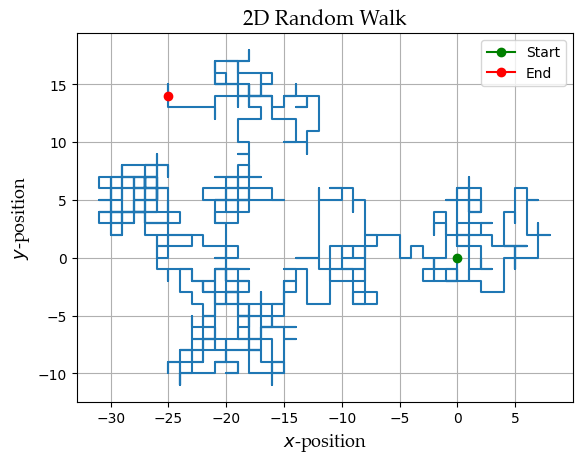

In [147]:
plt.plot(x_steps, y_steps)
plt.xlabel('$x$-position', **hfont)
plt.ylabel('$y$-position', **hfont)
plt.plot(x_steps[0], y_steps[0], marker='o', markersize=6, color='green', label='Start')
plt.plot(x_steps[-1], y_steps[-1], marker='o', markersize=6, color='red', label='End')
plt.title('2D Random Walk', **csfont)
plt.gca().set_aspect("equal")
plt.grid(True)
plt.legend()
plt.show()

## Multiple 2D Random Walks

This code conducts a simulation of 1000 two-dimensional random walks and visually represents their trajectories on a plot. Each walk's $x$ and $y$ coordinates are generated using a function called `walk_2D()`, and these coordinates are plotted with a line connecting successive points. The resulting plot showcases the collective patterns of the random walks.

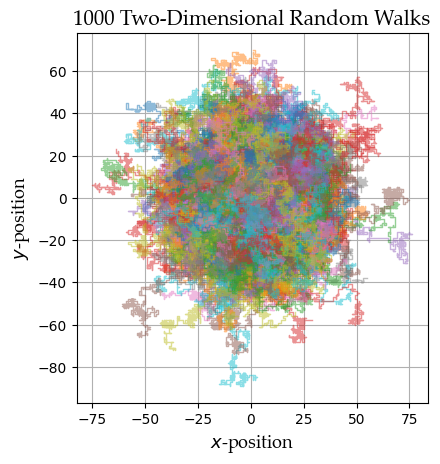

In [108]:
# N walks
n_walks = 1000
x_walks = []
y_walks = []

for i in range(n_walks):
    x_walk, y_walk = walk_2D(n_steps)
    plt.plot(x_walk, y_walk, linewidth=1, alpha=0.5)
    x_walks.append(x_walk)
    y_walks.append(y_walk)
    
plt.xlabel('$x$-position', **hfont)
plt.ylabel('$y$-position', **hfont)
plt.title('1000 Two-Dimensional Random Walks', **csfont)
plt.gca().set_aspect("equal")
plt.grid(True)
plt.show()

### Histogram for Final $x$ and $y$ Positions

This part explores the final positions of the simulated two-dimensional random walks. It begins by extracting the final $x$ and $y$ positions from the lists `x_walks` and `y_walks`. Subsequently, it calculates statistical measures such as mean, standard deviation, and variance for both the $x$ and $y$ positions. Using these, Gaussian distributions are constructed and overlaid onto histograms of the final $x$ and $y$ positions, providing a visual comparison between the empirical data and the theoretical Gaussian distributions. The left subplot depicts the histogram and Gaussian fit for the final $x$ positions, while the right subplot does the same for the final $y$ positions.

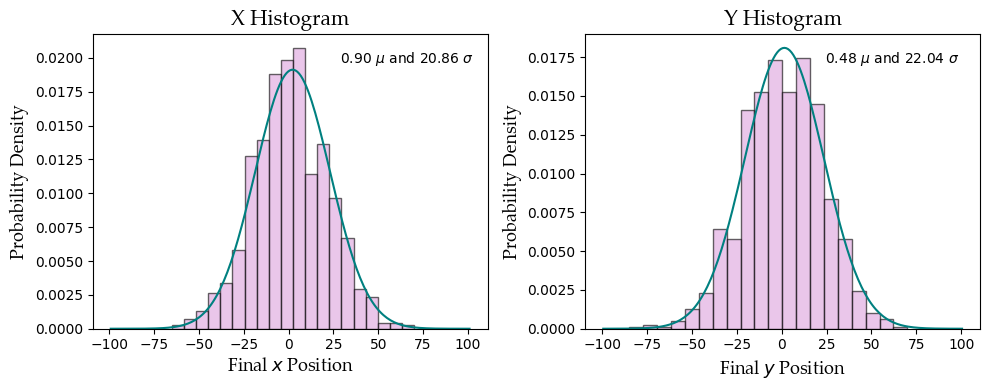

In [110]:
finxpos = [i[-1] for i in x_walks]
finypos = [j[-1] for j in y_walks]

plt.figure(figsize=(10, 4))

mux, muy = np.mean(finxpos), np.mean(finypos)
stdx, stdy = np.std(finxpos), np.std(finypos)
varx, vary = np.var(finxpos), np.var(finypos)

x_array1, g_array1 = np.linspace(mux-100, mux+100, 201), 1./np.sqrt(2*np.pi*varx) * np.exp(-0.5*(x_array-mux)**2/varx)
x_array2, g_array2 = np.linspace(muy-100, muy+100, 201), 1./np.sqrt(2*np.pi*vary) * np.exp(-0.5*(x_array-muy)**2/vary)
                                                                                           
plt.subplot(1, 2, 1)
plt.hist(finxpos, bins = 20, density = True, alpha=0.6, color='plum', edgecolor='black')
plt.plot(x_array1, g_array1, color='teal', label='Gaussian fit')
plt.figtext(0.345, 0.83, "{:.2f} $\mu$ and {:.2f} $\sigma$".format(mux, stdx))
plt.xlabel('Final $x$ Position', **hfont)
plt.ylabel('Probability Density', **hfont)
plt.title('X Histogram', **csfont)

plt.subplot(1, 2, 2)
plt.hist(finypos, bins = 20, density = True, alpha=0.6, color='plum', edgecolor='black')
plt.plot(x_array2, g_array2, color='teal', label='Gaussian fit')
plt.figtext(0.830, 0.83, "{:.2f} $\mu$ and {:.2f} $\sigma$".format(muy, stdy))
plt.xlabel('Final $y$ Position', **hfont)
plt.ylabel('Probability Density', **hfont)
plt.title('Y Histogram', **csfont)

plt.tight_layout()
plt.show()

### Relation Between End-to-End Distance and Number of Steps

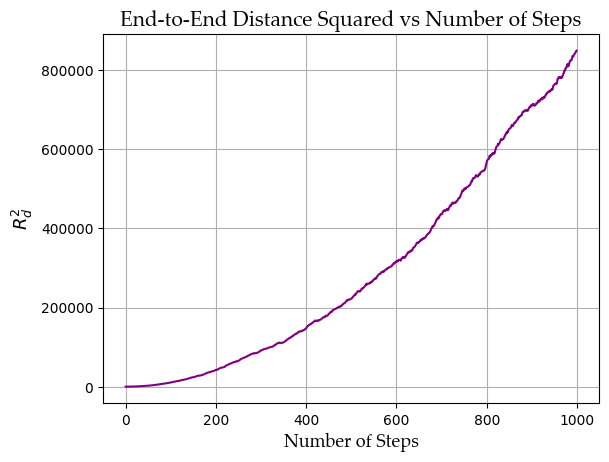

In [149]:
def Rd_2D(x_walks, y_walks):
    n_steps = len(x_walks[0]) - 1
    Rd = np.zeros(n_steps + 1)
    for x_walk, y_walk in zip(x_walks, y_walks):
        for i in range(1, n_steps + 1):
            Rd[i] += (x_walk[i] - x_walk[0])**2 + (y_walk[i] - y_walk[0])**2
    return (Rd/len(x_walks))**2

Rd2 = Rd_2D(x_walks, y_walks)
plt.plot(range(len(Rd2)), Rd2, color = 'purple')
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('$R_{d}^2$', **hfont)
plt.title('End-to-End Distance Squared vs Number of Steps', **csfont)
plt.grid(True)
plt.show()

---

# Variable Step-Length Random Walks

So far, we have just explored random walks with standard step sizes. However, the main aim of our project is essentially studying random walks with variable step-lengths.

## Exponential Distribution

Imagine a stroll where every step is a surprise, with lengths ranging from tiny hops to giant strides. The likelihood of each step falling between a certain range, say a to $a + \Delta a$, follows a mathematical pattern called a probability density function $f(a)$. In our case, $f(a)$ takes the form $f(a) = Ce^{-a}$ for $a > 0$, ensuring that all possible step lengths are covered and probabilities add up to 1 across the spectrum. The step sizes are given by this snippet: 

$\text{step_length} = -\ln(1 - \text{np.random.uniform()})$

The width of each *bin* in our step length spectrum, denoted by $\Delta a$, is something we can tweak. Let's consider at least 100 walks and observe their journey unfold. By repeating these walks numerous times, we can piece together the probability $p(x) \Delta x$, showing how likely it is for the walker to end up between $x$ and $x + \Delta x$ after completing the set number of steps N. Plotting $p(x)$ against $x$ reveals a pattern that we hope resembles the familiar bell curve of a Gaussian distribution.

### Single Walk

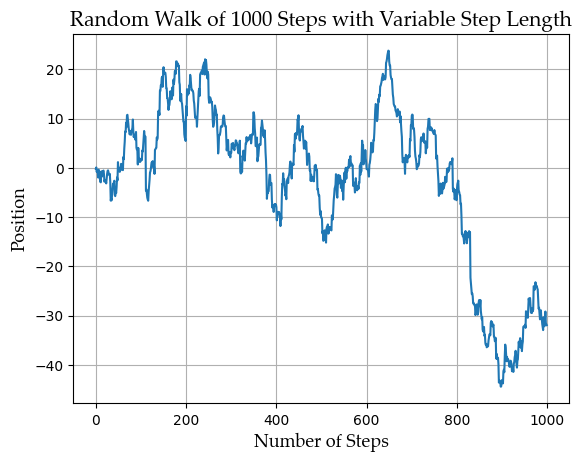

In [294]:
def random_walk(n_steps):
    position = 0
    positions = []
    step_length = []
    for i in range(n_steps):
        step = -np.log(1 - np.random.random())
        if np.random.random() < 0.5:
            position += step
        else:
            position -= step
        positions.append(position)
        step_length.append(step)
    return positions, np.array(step_lengths)

num_steps = 1000

positions, step_lengths = random_walk(num_steps)

plt.plot(np.array(positions))
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Position', **hfont)
plt.grid(True)
plt.title('Random Walk of 1000 Steps with Variable Step Length', **csfont)
plt.show()

### What does step length *vs* step number look like?

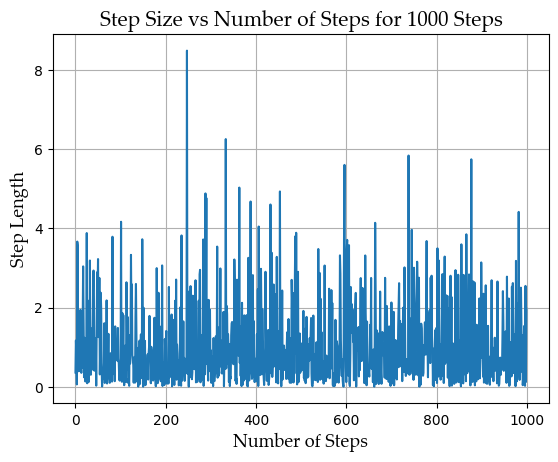

In [210]:
def random_walk2(N, delta_a): # An alternate way to get positions and step lengths
    step_lengths = -np.log(1 - np.random.random(N))
    displacement = np.sum(step_lengths) - N * delta_a / 2  # Correcting for bin width
    return step_lengths, displacement

# Parameters
N = 1000
delta_a = 1  # Bin width

step_lengths, displacement = random_walk2(N, delta_a)

plt.plot(np.arange(N), step_lengths)
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Step Length', **hfont)
plt.grid(True)
plt.title('Step Size vs Number of Steps for 1000 Steps', **csfont)
plt.show()

### Histogram of Step Lengths

Here, we can see that the histogram distribution matches the exponential distribution.

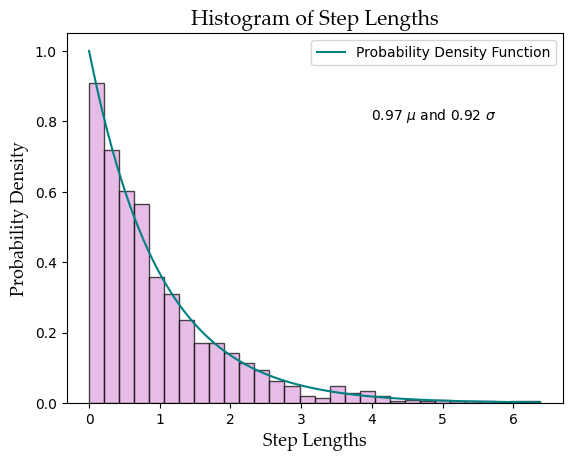

In [162]:
# Histogram
plt.hist(step_lengths, bins=30, density=True, alpha=0.7, color='plum', edgecolor='black')

mua = np.mean(step_lengths)
stda = np.var(step_lengths)

# Probability density function
a_values = np.linspace(0, max(step_lengths), 100)
plt.plot(a_values, np.exp(-a_values), 'teal', label='Probability Density Function')
plt.figtext(0.60, 0.70, "{:.2f} $\mu$ and {:.2f} $\sigma$".format(mua, stda))

plt.xlabel('Step Lengths', **hfont)
plt.ylabel('Probability Density', **hfont)
plt.title('Histogram of Step Lengths', **csfont)
plt.legend()
plt.show()

### Multiple Walks

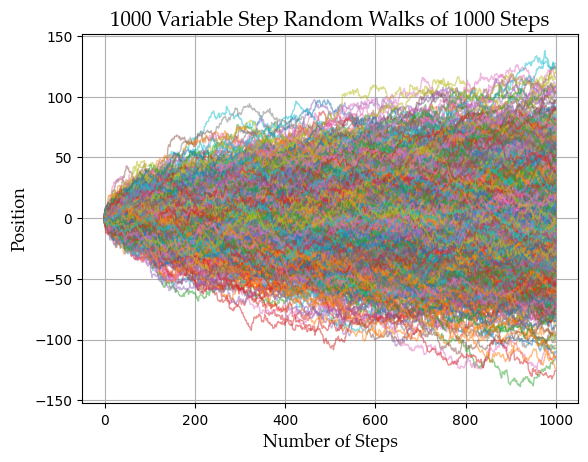

In [328]:
n_walks = 1000  # Number of walks
n_steps = 1000  # Number of steps

all_positions = []
all_step_lengths = []

for i in range(n_walks):
    positions, step_lengths = random_walk(n_steps)
    all_positions.append(positions)
    all_step_lengths.append(step_lengths)

for i in range(n_walks):
    plt.plot(all_positions[i], label=f'Walk {i+1}', alpha = 0.5, linewidth = 1)

plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Position', **hfont)
plt.grid(True)
plt.title(f'{n_walks} Variable Step Random Walks of {n_steps} Steps', **csfont)
plt.show()

### Histogram of Final Positions

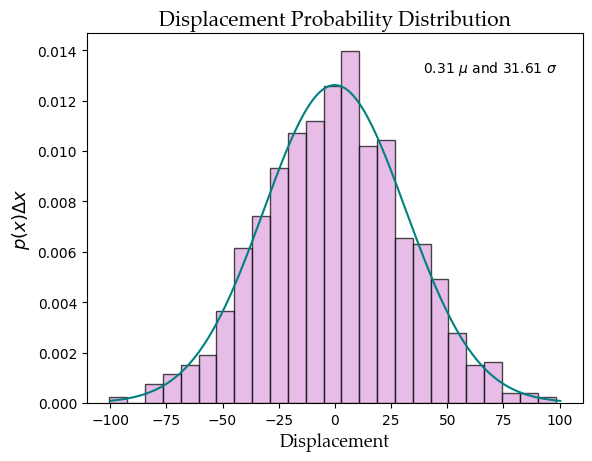

In [354]:
all_finpos = np.array([random_walk2(n_steps, 1)[1] for i in range(n_walks)])
mua2, vara2 = np.mean(all_finpos - 500), np.var(all_finpos - 500) # Shift of 500 due to a small error
xv_array = np.linspace(mua2 - 100, mua2 + 100, 201)
gv_array = 1. / np.sqrt(2 * np.pi * vara2) * np.exp(-0.5 * (x_array - mua2) ** 2 / vara2)

plt.hist(all_finpos - 500, bins=25, density = True, color='plum', edgecolor='black', alpha=0.7)
plt.plot(xv_array, gv_array, color='teal', label='Gaussian fit')
plt.xlabel('Displacement', **hfont)
plt.ylabel('$p(x) \Delta x$', **hfont)
plt.title('Displacement Probability Distribution', **csfont)
plt.figtext(0.65, 0.80, "{:.2f} $\mu$ and {:.2f} $\sigma$".format(np.mean(np.array(all_finpos - 500)), np.std(np.array(all_finpos - 500))))
plt.show()

### End-to-End Distances vs Number of Steps

Here, we get a linear relation between the square of the end-to-end distances and the number of steps.

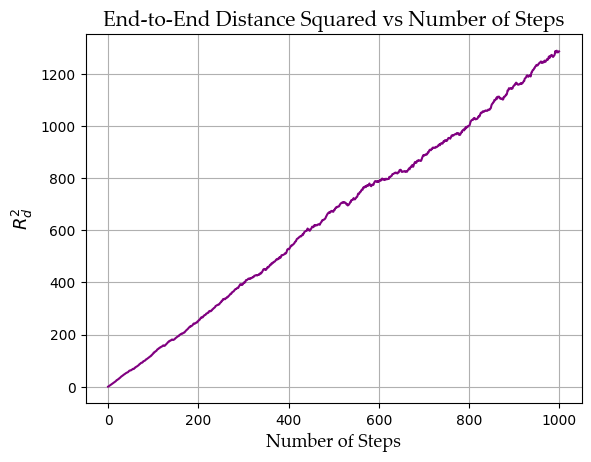

In [300]:
all_disv = Rd(all_positions)
plt.plot(range(len(all_disv)), all_disv, color = 'purple')
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('$R_{d}^2$', **hfont)
plt.title('End-to-End Distance Squared vs Number of Steps', **csfont)
# plt.gca().set_aspect("equal")
plt.grid(True)
plt.show()

# Levy Flights

Imagine a scenario where each step's length obeys a different rule, following the probability density function $f(a) = C/a^{2}$ for $a \geq 1$. To ensure our probabilities stay balanced across all possible step lengths, we try to the normalisation constant $C$. This constant makes sure that when we integrate $f(a)$ from 1 to infinity, the result equals 1. With $C$ in hand, generating step lengths according to this distribution becomes easy with the code snippet:

$\text{step_length} = 1 / 1 - \text{np.random.random()}$

This gives us the step lengths that match with our power-law probability density function. We can now perform a Monte Carlo simulation, where we find the probabilities $p(x) \Delta x$ for the walker's displacement after a number of steps. This is essentially known as Levy flights, where the probability density decreases following a power law $a^{-1-\alpha}$, introducing us to intriguing patterns when $\alpha \leq 2$.

To determine the normalization constant $C$, we integrate the probability density function $f(a)$ over its valid range:

$C = \int_{1}^{\infty} \frac{1}{a^2} \, \text{d}a$

$C = \left[ -\frac{1}{a} \right]_{1}^{\infty}$

Since $\lim_{a \to \infty} \frac{1}{a} = 0$, the upper limit contributes zero, leaving us with:

$C = -\left( -\frac{1}{1} \right) = 1$

So, $C = 1$.

For $\alpha \leq 2$, the form of $p(x)$ is not Gaussian; it follows a power-law distribution due to the Levy flight behaviour.

## Single Levy Flight

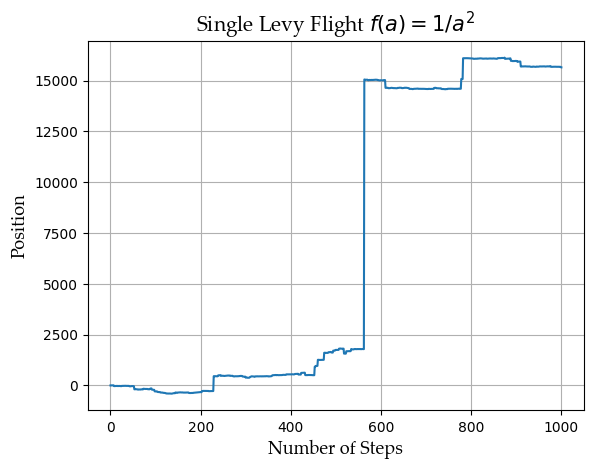

In [321]:
def levy(steps):
    position = 0
    positions = [position]
    for i in range(steps):
        step = 1/(1 - np.random.random())
        if np.random.random() < 0.5:
            position += step
        else:
            position -= step
        positions.append(position)
    return positions

positions = levy(1000) # Levy flight of 1000 steps

plt.plot(positions)
plt.xlabel('Number of Steps', **hfont)
plt.ylabel('Position', **hfont)
plt.grid(True)
plt.title('Single Levy Flight $f(a) = 1/a^{2}$', **csfont)
plt.show()

## Multiple Levy Flights (Probability Distribution)

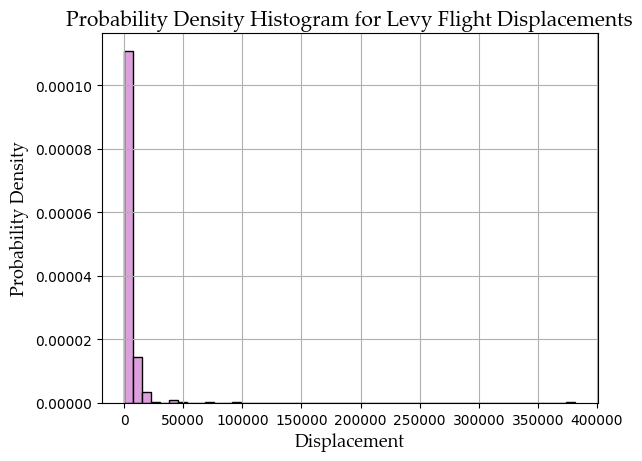

In [376]:
def levy_flight(n_steps):
    step_lengths = 1 / (1 - np.random.random(n_steps))
    return np.cumsum(step_lengths - 1) # Displacement

n_walks = 200
n_steps = 1000

# 1000 Levy flights
all_displacements = []
for _ in range(num_walks):
    displacements = levy_flight(num_steps)
    all_displacements.extend(displacements)

plt.hist(all_displacements, density = True, color = 'plum', bins=50, edgecolor='black')
plt.xlabel('Displacement', **hfont)
plt.ylabel('Probability Density', **hfont)
plt.title('Probability Density Histogram for Levy Flight Displacements', **csfont)
plt.grid(True)
plt.show()

## 2D Levy Flight

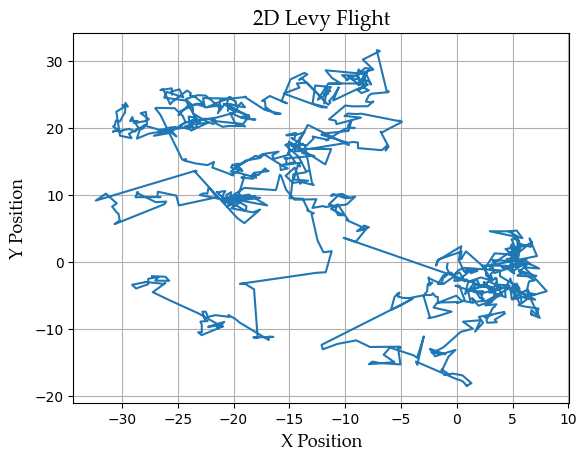

In [388]:
def levy_2D(alpha, size):
    # Generating random steps from a Levy distribution
    step_sizes = np.random.standard_cauchy(size=size)
    step_angles = np.random.uniform(0, 2 * np.pi, size=size)
    
    # Step Lengths
    step_lengths = step_sizes * (np.random.exponential(scale=1/np.abs(step_sizes)) ** (1/alpha))
    
    # Compute x and y coordinates
    x_steps = step_lengths * np.cos(step_angles)
    y_steps = step_lengths * np.sin(step_angles)
    
    return x_steps, y_steps

x_steps, y_steps = levy_flight(1.5, 1000)

# Calculating cumulative sum to get trajectory
x = np.cumsum(x_steps)
y = np.cumsum(y_steps)

plt.plot(x, y)
plt.title('2D Levy Flight', **csfont)
plt.xlabel("X Position", **hfont)
plt.ylabel("Y Position", **hfont)
plt.grid(True)
plt.show()